In [1]:
import scipy
import numpy
import matplotlib
import sklearn
import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Req. 1. 선형 회귀 모델 구현

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from drive.MyDrive.subpjt1.models.linear_model import LinearModel

### Req. 1-1 데이터 읽기 및 시각화

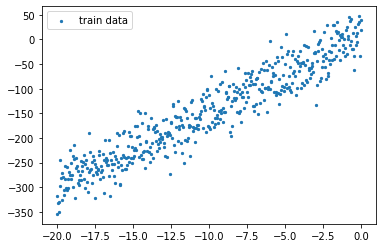

In [4]:
# 데이터 불러오기
train_data = np.load("/content/drive/MyDrive/subpjt1/datasets/linear_train.npy")
test_x = np.load("/content/drive/MyDrive/subpjt1/datasets/linear_test_x.npy")

# tf 형식에 맞게 변환
x_data = np.expand_dims(train_data[:,0], axis=1)
y_data = train_data[:,1]

plt.scatter(x_data,y_data,s=5,label="train data")
plt.legend()
plt.show()

### Req. 1-2 ~ 1-5

Epoch 1/10
16/16 [==============================] - 1s 1ms/step - loss: 4589.6899 - mean_squared_error: 4589.6899
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 925.8304 - mean_squared_error: 925.8304
Epoch 3/10
16/16 [==============================] - 0s 1ms/step - loss: 926.6596 - mean_squared_error: 926.6596
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 925.6932 - mean_squared_error: 925.6932
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 924.9350 - mean_squared_error: 924.9350
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 923.1947 - mean_squared_error: 923.1947
Epoch 7/10
16/16 [==============================] - 0s 1ms/step - loss: 919.4619 - mean_squared_error: 919.4619
Epoch 8/10
16/16 [==============================] - 0s 1ms/step - loss: 923.8038 - mean_squared_error: 923.8038
Epoch 9/10
16/16 [==============================] - 0s 1ms/step - loss: 923.1794 - mean_squared_error:

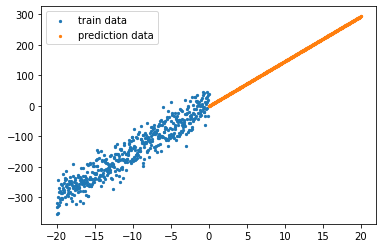

Model: "linear_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Req. 1-2
# 모델 생성
model = LinearModel(num_units=1)

# Req. 1-3
# 최적화 함수, 손실함수와 모델 바인딩
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
			  loss=tf.keras.losses.MSE,
			  metrics=[tf.keras.metrics.MeanSquaredError()])

# Req. 1-4
# 모델 학습
model.fit(x=x_data, 
		  y=y_data, 
		  epochs=10, 
		  batch_size=32)


# Req. 1-5
# 모델 테스트
prediction = model.predict(x=test_x,
    					   batch_size=None)


# 결과 시각화
plt.scatter(x_data,y_data,s=5,label="train data")
plt.scatter(test_x,prediction,s=5,label="prediction data")
plt.legend()
plt.show()


# 모델 정리
model.summary()

# Req. 2. 이미지 캡셔닝

# Req. 3. 이미지 캡셔닝 데이터 전처리


In [20]:
import pandas as pd
 
captions = pd.read_csv('/content/drive/MyDrive/subpjt1/datasets/captions.csv', sep = "|", error_bad_lines=False, encoding='latin_1')
captions

,image_name,comment_number,"comment,,,,,,,,,"
0,1000092795.jpg,0.0,Two young guys with shaggy hair look at their...
1,1000092795.jpg,1.0,Two young White males are outside near many b...
2,1000092795.jpg,2.0,Two men in green shirts are standing in a yar...
3,1000092795.jpg,3.0,"A man in a blue shirt standing in a garden .,..."
4,1000092795.jpg,4.0,"Two friends enjoy time spent together .,,,,,,,,,"
...,...,...,...
158910,998845445.jpg,0.0,A man in shorts and a Hawaiian shirt leans ov...
158911,998845445.jpg,1.0,"A young man hanging over the side of a boat ,..."
158912,998845445.jpg,2.0,A man is leaning off of the side of a blue an...
158913,998845445.jpg,3.0,"A man riding a small boat in a harbor , with ..."
